In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl

In [2]:
help(temp_lib)

Help on class temp_lib in module lib:

class temp_lib(builtins.object)
 |  temp_lib(image)
 |  
 |  Class used to perform spectral analysis
 |  
 |  Attributes:
 |  
 |  image : numpy ndarray  of shape (Nx, Ny)
 |  s :  integer - sampling ratio
 |  x, y : numpy ndarray  with respective shapes Nx et Ny
 |  fs : sampling frequency
 |  ds_band : numpy ndarray of shape Nx  - > extracted band from the image
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cross_spectro(self, other)
 |      Calculates either the product or the difference between the computed spectrograms of two ds_bands (signals)
 |      Assuming that the spectrograms are computed
 |  
 |  decrease_resolution(self, n)
 |      Decreases the resolution using numpy.convolve and updates ds_band
 |      Reset by calling extract_band
 |  
 |  extract_band(self, interval=None)
 |      Extracts a band from the image.
 |      If interval is a

In [3]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:79: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:81: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(other._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


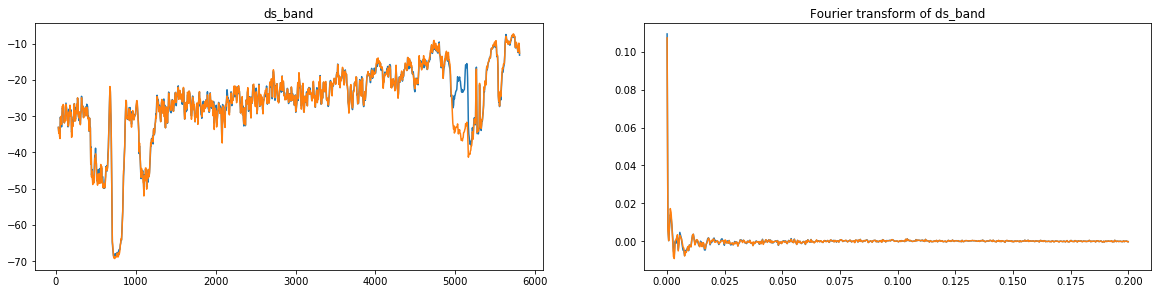

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:79: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(self._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


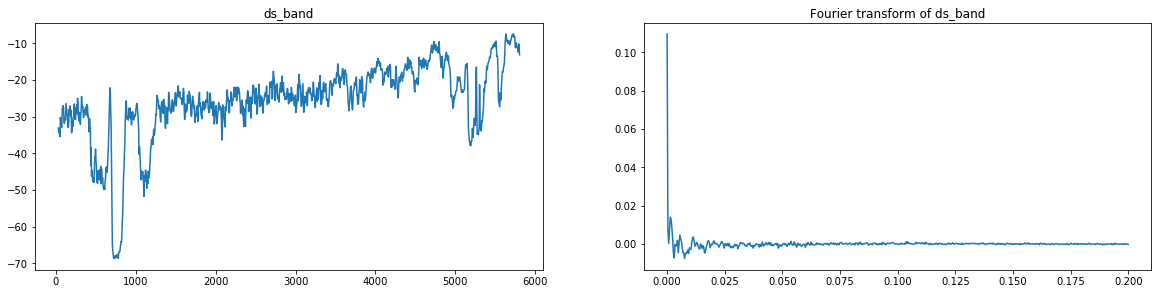

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


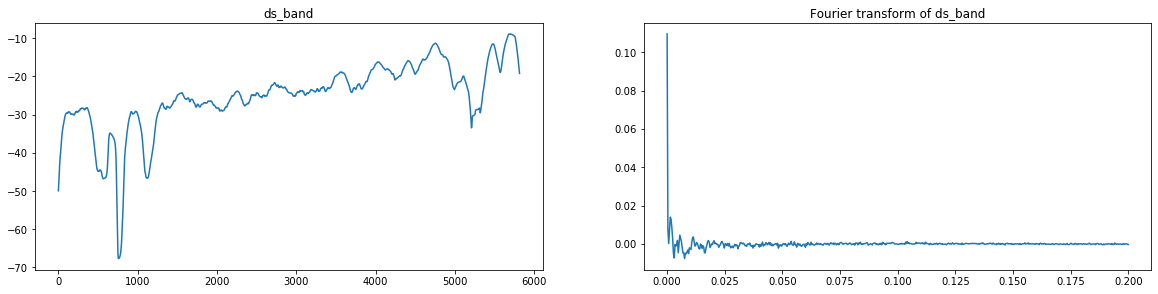

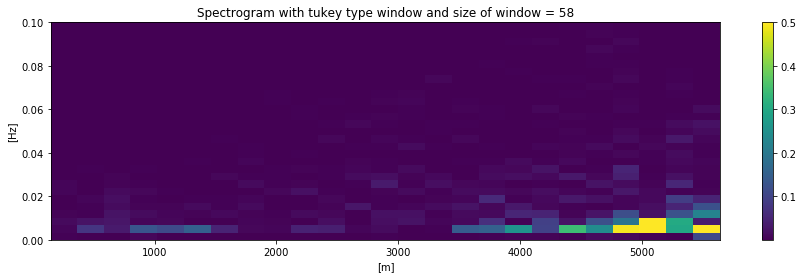

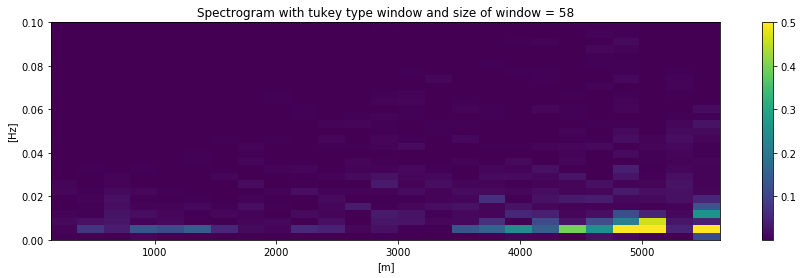

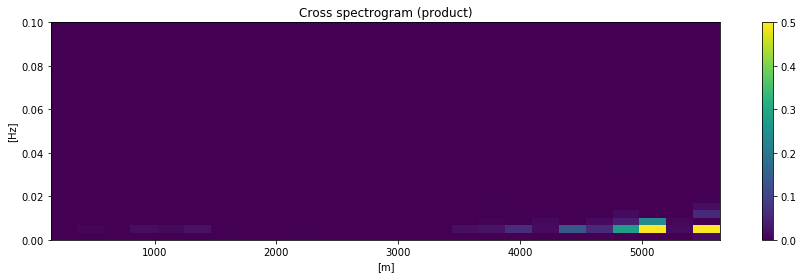

In [4]:
element1 = temp_lib(ds_band1)
element3 = temp_lib(ds_band3)


element1.plot_TF(element3)

element1.plot_TF()
element1.decrease_resolution(20)
element1.plot_TF()
element1.extract_band()

element1.spectrogram('tukey')
element3.spectrogram('tukey')
element1.cross_spectro(element3)